# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\mikiko.b\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


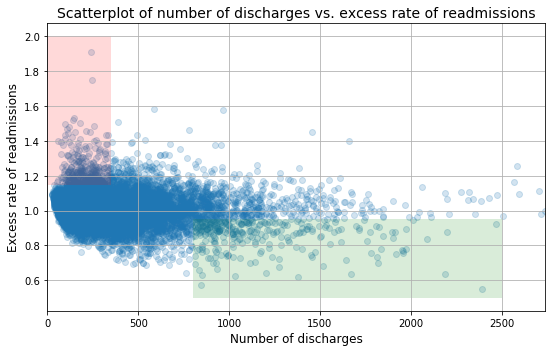

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


## A. Do you agree with the above analysis and recommendations? Why or why not?


There are a couple of issues with the analysis that should be addressed, from the data treatment to the conclusions themselves.

#### Framing of problem:
    
    - Cutoff of large hospitals from small hospitals at 100 discharges seems arbitrary
    - Predicted readmissions / expected readmissions = makes no sense, should be actual rate of readmissions / expected rate of readmissions
    - Not super clear how good a proxy # of discharges is for the size of the hospital 
    

#### Data Cleaning:
    - Null discharge values are just dropped with no examination of whether there could be issues of bias 


#### Initial EDA:

    - The relationship the paper refers to isn't particularly obvious and no supporting metrics are provided 
    - Statistics provided are relatively meaningless - get no sense of the distributions of the different groups
    - No robust statistical analysis is provided in order for us to evaluate the claim
    
    
#### Conclusions:
    
    - Showed no test for correlation or hypothesis testing
    - Didn't report statistical significance 
    - Relationship of hospital capacity to discharges seems irrelevant - Why does it matter that size of hospitals is related to readmission rates and funding goals? 
    
    -Even if smaller hospitals do show statistically significant difference, lacking in resources might not be the exact reason; there could be differences in patient population (hospitals could be more specialized; could be geo differences; etc)
    -If the conclsuion is true, the moral efficacy of cutting off funding to hospitals that may need it because of a lack of resources, revenue, etc could potentially result in additional harm to patients == > goal of program, analysis must be questioned in that regard
        
    
    
   
   

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

###   1. Setup an appropriate hypothesis test.

Ho: Mean of ERR for large hospitals (# of discharges > 100) = Mean of ERR for small hospitals (# of discharges < 100)

Ha: They aren't equal

We'll use a two sample t-test 



###   2. Compute and report the observed significance value (or p-value).

In [6]:
#Frequentist Approach

df = hospital_read_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [7]:
# Drop irrelevant columns
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows that are missing Discharge information 
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls 
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [8]:
import numpy as np

# Separate observations by hospital size
large = df[df['Number of Discharges'] > 100]
small = df[df['Number of Discharges'] <= 100]

print("Small Hospitals: \n", small.describe(), "\n")
print("Large Hospitals: \n", large.describe())


Small Hospitals: 
        Number of Discharges  Excess Readmission Ratio
count           1223.000000               1223.000000
mean              75.440720                  1.022088
std               17.190219                  0.058154
min               25.000000                  0.893500
25%               63.000000                  0.983800
50%               78.000000                  1.016700
75%               90.000000                  1.052750
max              100.000000                  1.495300 

Large Hospitals: 
        Number of Discharges  Excess Readmission Ratio
count          10274.000000              10274.000000
mean             399.990364                  1.005768
std              308.929299                  0.095046
min              101.000000                  0.549500
25%              194.000000                  0.947725
50%              312.000000                  1.000800
75%              505.000000                  1.059600
max             6793.000000               

In [9]:
import numpy as np
from scipy.stats import ttest_ind

large_series = large[['Excess Readmission Ratio']]
small_series = small[['Excess Readmission Ratio']]


# Use scipy.stats.ttest_ind.
t, p = ttest_ind(large_series, small_series, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = -8.54904  p = 2.35216e-17


p-value seems quite low so we'll aso use a hacker statistic method to verify.

In [10]:
# Null hypothesis: The distributions of ERR for large and small hospitals are identical.
# Define test statistic 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data
diff_obs = diff_of_means(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(large)]
    perm_small = both_perm[len(large):]
    #Draw replicates
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.01632073298728165
p-value: 0.0


###   3. Report statistical significance for $\alpha$ = .01. 

Based on both the methodologies employed, we can reject the null hypothesis that the means are equal and conclude there could be a statistically significant difference between the ERR for large and small hospitals. 

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Concluding that there is a significance in ERR for large and small hospitals doesn't explain the underlying reasons or raise potential confounding variables. Ultimately the idea of pursuing a policy that could penalize small hospitals at the risk of public health based on the analysis seems short-sighted and incredibly narrow.

We can construct additional charts and note population differences but arguments in the realm of international aid have been made that cutting aid to highly underdeveloped countries (which are not always the most effective at using aid) is cutting of populations that are in most need of aid. 

C:\Users\mikiko.b\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


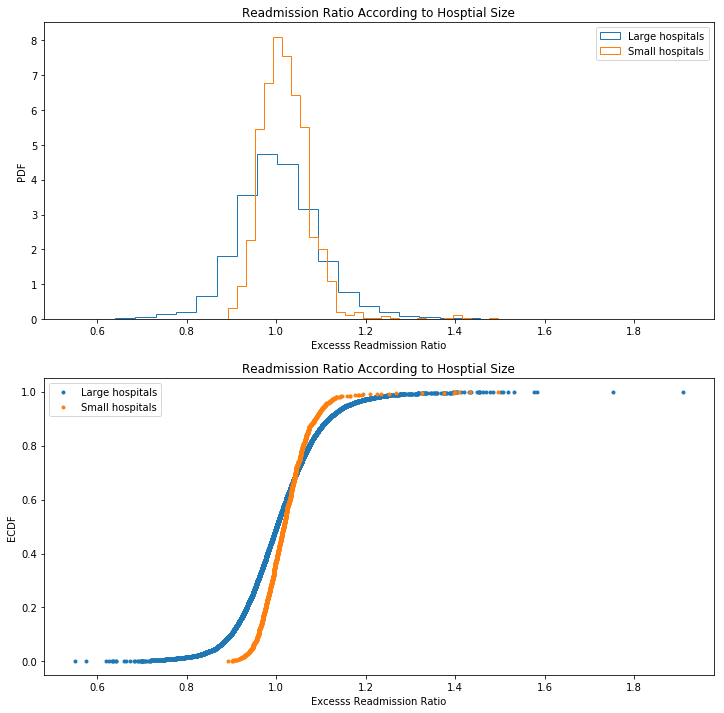

In [11]:
# Compute ecdfs
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x_large, y_large = ecdf(large['Excess Readmission Ratio'])
x_small, y_small = ecdf(small['Excess Readmission Ratio'])

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(large['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.hist(small['Excess Readmission Ratio'], bins=30, normed=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio According to Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

- The advantages of using the above scatter plot to convey information are:

    1. It shows (almost) all of the data rather than summary statistics.
    2. It communicates a small negative correlation between ERR and hospital size.

- The disadvantages of using the above scatter plot are:

    1. It doesn't communicate as clearly the relationship between ERR and hospital size (number of discharges). 
    2. You can't distinguish between the large vs small hospitals. The data and nuances are lost in a cloud of points, 

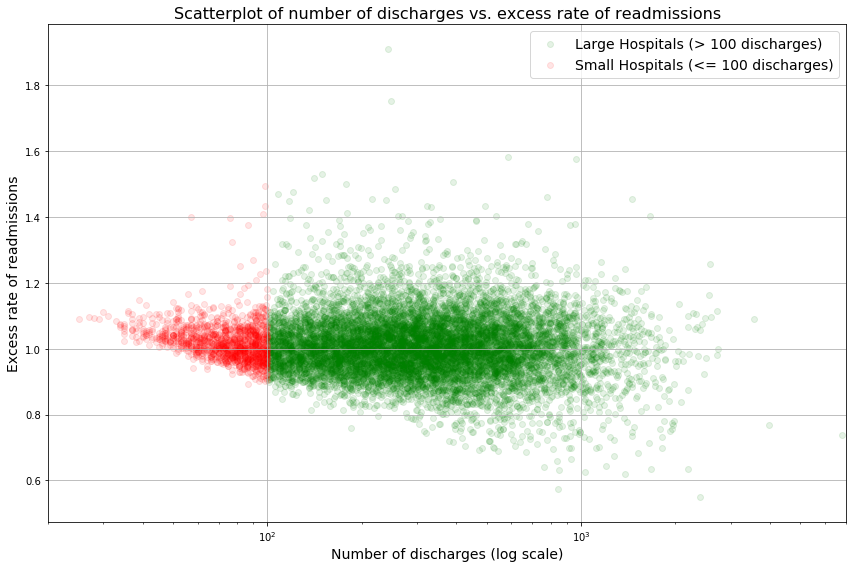

In [12]:
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_large, y_large, color='green', alpha=0.1)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=14)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=14)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=16)
_ = ax.legend(['Large Hospitals (> 100 discharges)', 'Small Hospitals (<= 100 discharges)'], fontsize=14)

ax.grid(True)
fig.tight_layout()